# Computing Lagrangian Descriptors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from pylds.base import compute_lagrangian_descriptor
from pylds.tools import draw_ld, draw_all_lds, normalise

This expressions matches the one in the Overleaf project of the students

In [2]:
def Bohmian_velocity_field(t, u, PARAMETERS=[1,1,1]):
    x, y = u.T
    #model parameters
    a, b, omega2 = PARAMETERS
    #velocity components
    G = 1 + 2*a*x*np.cos(t) +\
        2*b*np.sqrt(omega2)*x*y*np.cos((1 + omega2)*t) +\
        (a*x)**2 +\
        2*a*b*np.sqrt(omega2)*x**2*y*np.cos(omega2*t) +\
        omega2*(b*x*y)**2
    vx = -(a*np.sin(t) + b*np.sqrt(omega2)*y*np.sin((1 + omega2)*t))/G
    vy = -b*np.sqrt(omega2)*x*(a*x*np.sin(omega2*t) + np.sin((1 + omega2)*t))/G
    
    return np.column_stack([vx, vy])

In [3]:
def Bohmian_nodal_point(t, PARAMETERS=[1,1,1]):
    #model parameters
    a, b, omega2 = PARAMETERS
    #nodal components
    x_nodal = -np.sin((1 + omega2)*t)/(a*np.sin(omega2*t))
    y_nodal = -a*np.sin(t)/(b*np.sqrt(omega2)*np.sin((1 + omega2)*t))
    
    return np.column_stack([x_nodal, y_nodal])

<span style="color:red">__NOTE__ </span> Statements

* Whenever $\omega_1 / \omega_2$ is _rational_ , then all trajectories are _periodic_ (Why?)

* Whenever $\omega_2$ is _irrational_ , with $\omega_1 = $, then regular and chaotic trajectories coexist (Why?)

* However, when $\omega_1 / \omega_2$ is a _high-order rational_ (e.g., 269/676), trajectories can be quite complicated but still periodic. Numerically, this can be difficult to show if trajectories are not computed accurately enough. So, this can be mistakenly identified as chaotic!



# Regular dynamics

* WAVE EQUATION: Differences in notation

_Students notation_

\begin{equation}
    \Psi = c_{0,0}\psi_{0,0} + a\:c_{1,0}\psi_{1,0} + b\:c_{1,1}\psi_{1,1}
\end{equation}

Setting $\omega_1=1$ and $\omega_2=\frac{1}{c^2}$ for some $c \in \mathbb{R}$, and setting $c_{0,0}= 1, c_{1,0}= \frac{1}{\sqrt{2}}, c_{1,1}= \frac{1}{2}$.

_Notation followed_

\begin{equation}
    \Psi = \psi_{0,0} + C_{1}\psi_{1,0} + C_{2}\psi_{1,1}
\end{equation}

where $C_1 = \frac{a}{\sqrt{2}}$ and $C_2 = \frac{b}{2}$

* ASSAYS
   * __First__, test the effect on the dynamics revealed by LDs, as we add up excited states to the ground state
   * __Second__, test the effect on the dynamics revealed by LDs, as the dynamics changes from regular to chaotic when the ratio of angular frequencies, $\omega_1 / \omega_2$, changes from rational to irrational. 
   * __Third__, LD convergence with integration time $\tau$

## Case: $a, b, \omega_2 = (0, 0, 1)$

* Wave function

\begin{equation*}
    \Psi = \psi_{0,0}
\end{equation*}

* Bohm equations of motion

\begin{aligned}
    \frac{dx}{dt}=0 \\
    \frac{dy}{dt}=0
\end{aligned}

* Nodal points (where $\Psi(x_N, y_N) = 0$)


## Case: $a, b, \omega_2 = (1, 0, 1)$

* Wave function

\begin{equation*}
    \Psi = \psi_{0,0} + \frac{1}{\sqrt{2}}\psi_{1,0}
\end{equation*}

* Bohm equations of motion

\begin{aligned}
    \frac{dx}{dt} &= -\frac{\sin(t)}{1+2x\cos(t)+x^2}\\
    \frac{dy}{dt} &= \; 0
\end{aligned}

* Nodal points (where $\Psi(x_N, y_N) = 0$)


In [4]:
a, b, omega2 = [1, 0, 1]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2])

In [208]:
# Integration parameters
tau = 40

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [300, 300]

# Box boundaries for Variable Time Integration
box_x_min, box_x_max = [-10, 10]

In [209]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

In [210]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

Draw trajectories

In [211]:
# IC = np.array([-1.00001, 1])
# IC = np.array([3, 1])
IC = np.array([1, 0])
t0, tf = [0, tau]; time_span = (t0, tf)
solution = solve_ivp(vector_field, time_span, IC, rtol=1.0e-12)
trajectory = solution.y

Text(0, 0.5, '$y$')

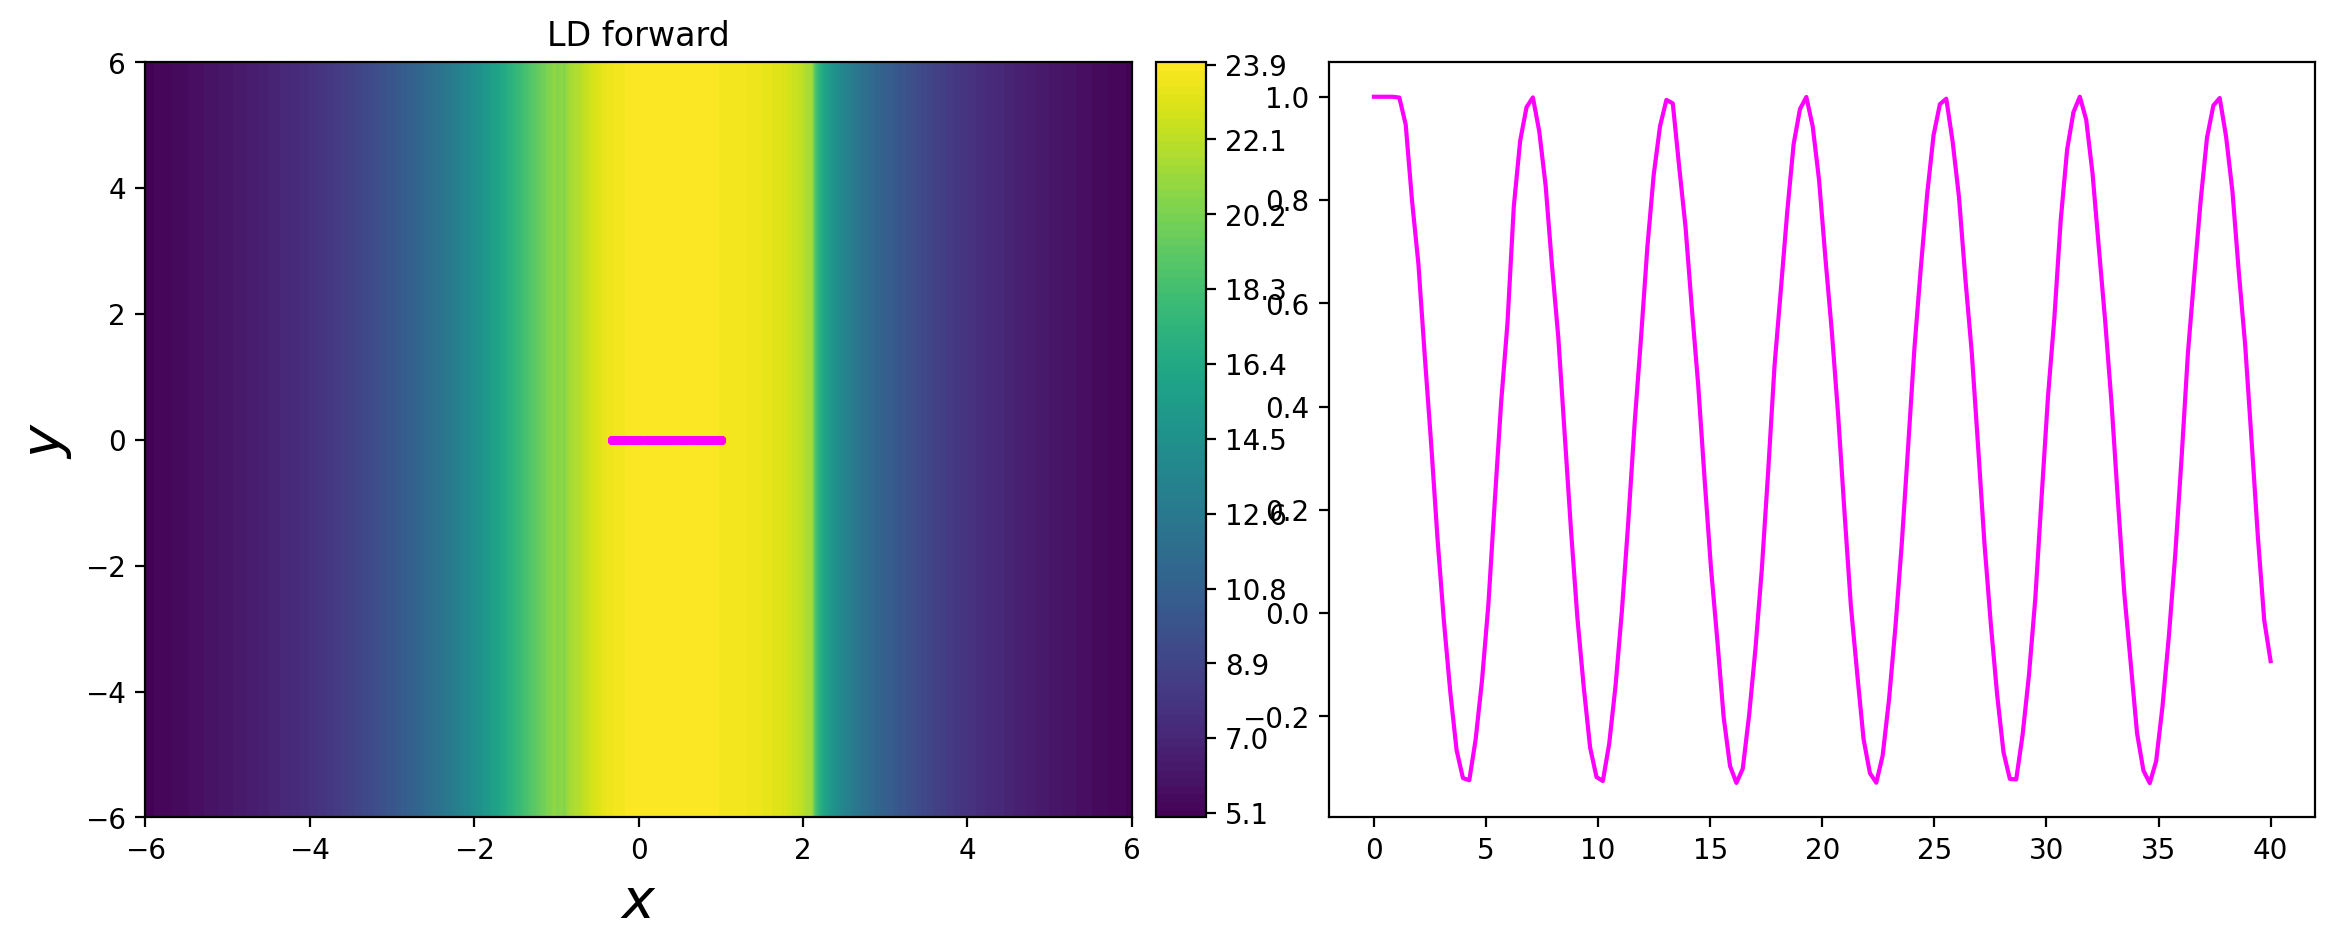

In [212]:
fig, ax = plt.subplots(1, 2, figsize=(14,5), dpi=200)

LD = LD_forward

color_traj = 'magenta'
ax[0].scatter(*trajectory, s=5, c=color_traj, zorder=10)
ax[1].plot(np.linspace(*time_span,len(trajectory[0])) , trajectory[0], c=color_traj)

draw_ld(fig, ax[0], LD, grid_parameters, "LD forward", interactive=False, cmap='viridis')

ax[0].set_xlabel("$x$", fontsize=20)
ax[0].set_ylabel("$y$", fontsize=20)

The nodal lines actually make a continuum along $y$

## Case: $a, b, \omega_2 = (0, 1, 1)$

* Wave function

\begin{equation*}
    \Psi = \psi_{0,0} + \frac{1}{2}\psi_{1,1}
\end{equation*}

In [213]:
a, b, omega2 = [0, 1, 1]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2])

In [214]:
# Integration parameters
tau = 15

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [300, 300]

# Box boundaries for Variable Time Integration
box_x_min, box_x_max = [-10, 10]

In [215]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
box_boundaries = False#[(box_x_min, box_x_max)]

In [218]:
t0, tf, dt = [1, tau, 0.001]
nodal_point = Bohmian_nodal_point(np.arange(t0, tf, dt), PARAMETERS=[a, b, omega2])

/home/ba13026/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


Text(0, 0.5, '$y$')

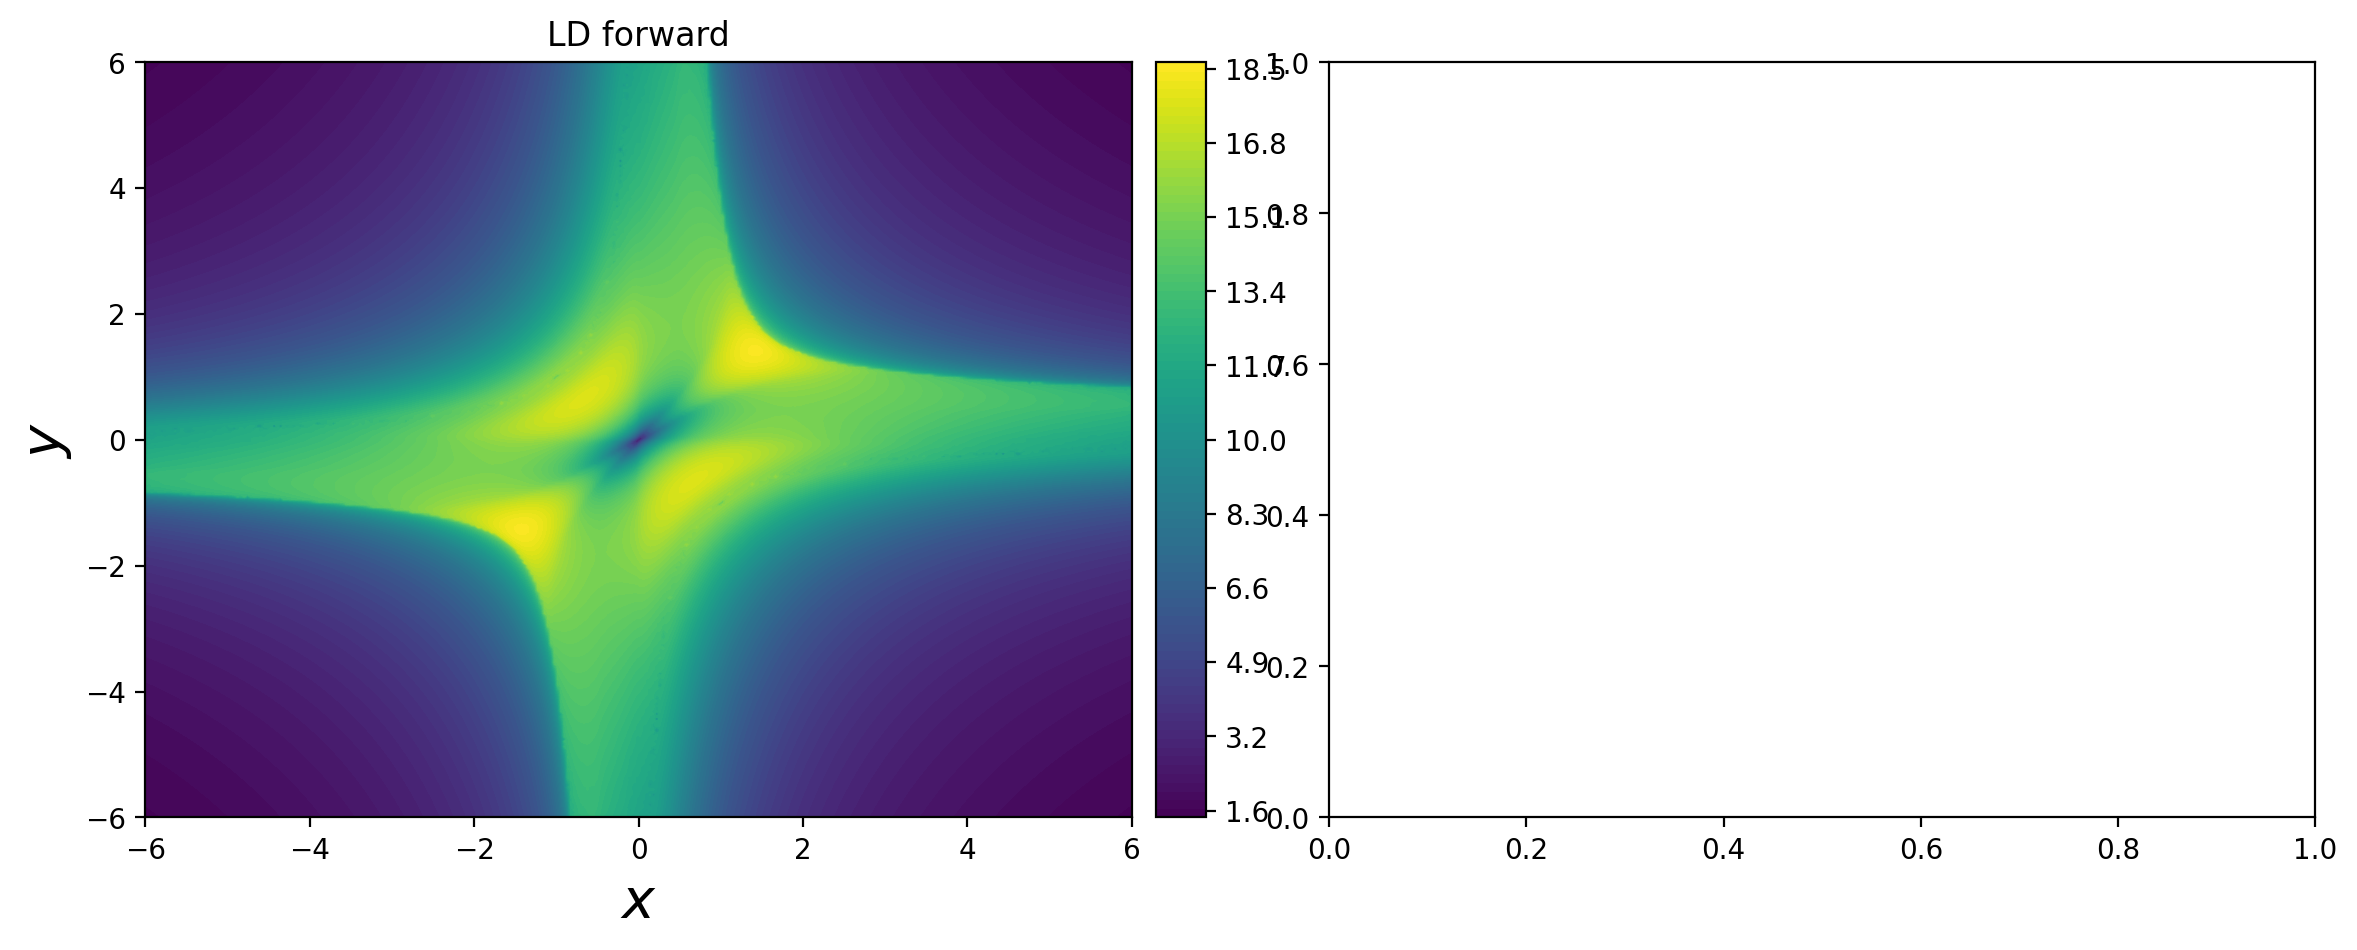

In [217]:
fig, ax = plt.subplots(1, 2, figsize=(14,5), dpi=200)

LD = LD_forward
draw_ld(fig, ax[0], LD, grid_parameters, "LD forward", interactive=False, cmap='viridis')

# color_traj = 'magenta'
# ax[0].scatter(*trajectory, s=5, c=color_traj, zorder=10)
# ax[1].plot(np.linspace(*time_span,len(trajectory[0])) , trajectory[0], c=color_traj)

ax[0].set_xlabel("$x$", fontsize=20)
ax[0].set_ylabel("$y$", fontsize=20)

<span style="color:red">__TO-DO__</span> Do convergence assays for different values of $\tau = 0.1, 1, 3, 5, 8, 15$

## Case: $a, b, c = (1, 1, 1)$

In [238]:
a, b, omega2 = [1, 1, 1]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2])

In [239]:
# Integration parameters
tau = 10

# LDp, p-value
p_value = 0

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [100, 100]

# Box boundaries for Variable Time Integration
box_x_min, box_x_max = [-10, 10]

In [240]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
box_boundaries = [(box_x_min, box_x_max)]

In [241]:
t0, tf, dt = [0.1, tau, 0.001]
nodal_point = Bohmian_nodal_point(np.arange(t0, tf, dt), PARAMETERS=[a, b, omega2])

In [242]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value, box_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value, box_boundaries)

In [243]:
LD = LD_forward + LD_backward
LD = normalise(LD)

<IPython.core.display.Javascript object>


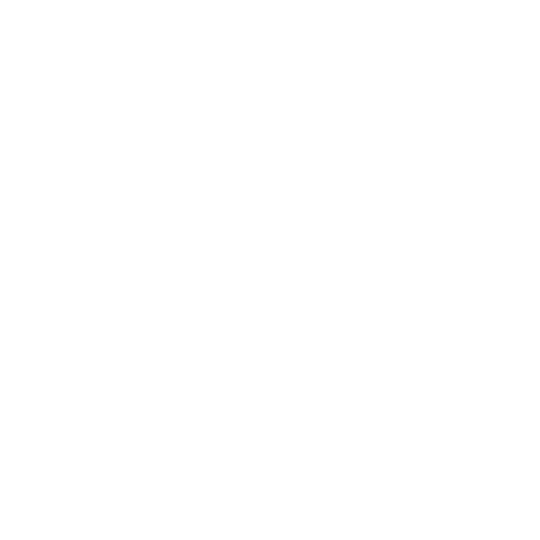

<IPython.core.display.Javascript object>


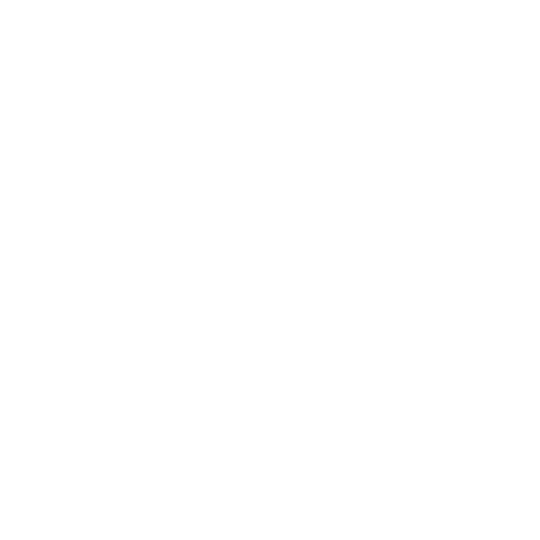

In [244]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

draw_ld(fig, ax, LD, grid_parameters, "Total LD", False, cmap='viridis')

## Simulations

SCRIPT

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from pylds.base import compute_lagrangian_descriptor
from pylds.tools import draw_ld, draw_all_lds, normalise

def Bohmian_velocity_field(t, u, PARAMETERS=[1,1,1]):
    x, y = u.T
    #model parameters
    a, b, omega2 = PARAMETERS
    #velocity components
    G = 1 + 2*a*x*np.cos(t) +\
        2*b*np.sqrt(omega2)*x*y*np.cos((1 + omega2)*t) +\
        (a*x)**2 +\
        2*a*b*np.sqrt(omega2)*x**2*y*np.cos(omega2*t) +\
        omega2*(b*x*y)**2
    vx = -(a*np.sin(t) + b*np.sqrt(omega2)*y*np.sin((1 + omega2)*t))/G
    vy = -b*np.sqrt(omega2)*x*(a*x*np.sin(omega2*t) + np.sin((1 + omega2)*t))/G
    
    return np.column_stack([vx, vy])
    
t0 = sys.argv[1] # initial time
tau = 20
    
a, b, omega2 = [1, 1, 1]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2])

# LDp, p-value
p_value = 0

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [300, 300]

grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
box_boundaries = False#[(box_x_min, box_x_max)]

LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, (tau+t0), p_value, box_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -(tau+t0), p_value, box_boundaries)

LD_forward.dump("simulations/LDf_test_.dat")
LD_backward.dump("simulations/LDb_test_.dat")


# Mixed dynamics